# Influence of COVID-19 on world economy

This notebook was created to study the influence of COVID-19 pandemic on the economy of the countries around the world.

The data was gathered from Our World in Data.

In [2]:
# importing the libraries used for the analysis
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_theme()

import ipywidgets as widgets

In [117]:
# importing the data
data = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [118]:
# Let us drop some of the data columns, that shall not be used
data = data.drop(['iso_code','new_cases_smoothed','new_deaths_smoothed',
                  'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
                  'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
                  'icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million',
                  'weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions',
                  'weekly_hosp_admissions_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'new_tests_smoothed','new_tests_smoothed_per_thousand','new_vaccinations',
                  'total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                  'total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed',
                  'new_people_vaccinated_smoothed_per_hundred','excess_mortality_cumulative_absolute',
                  'excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'], axis=1)

In [119]:
# transforming the 'date' column into datetime format
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)

In [120]:
# Defining a function to retrieve the data for a given country
def retrieveCountry(country):
    dt = data.copy()
    dt = dt[dt['location']==country]
    return dt


# Defining a function to smooth data for the plot
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [142]:
# Defining a function to plot the number of cases per day
def plotCases(country='Brazil'):
    dt = retrieveCountry(country)
    plt.figure(figsize=(12, 4))
    y2 = smooth(dt['new_cases'],7)
    sns.set_style("whitegrid")
    sns.lineplot(x=dt['date'], y=dt['new_cases'], color='black', linewidth=0.4)
    sns.lineplot(x=dt['date'], y=y2, color='red', linewidth=2)
    plt.xlabel("Date")
    plt.ylabel("New Cases")
    plt.title(country)
    plt.xticks(rotation=45)
    plt.legend(labels=['Raw data', '7-days average'], bbox_to_anchor = (1.2, 0.5), loc='center right')
    return plt.show()

# Defining an interactive tool to select the country for the plot
widgets.interact(plotCases,country=data['location'].unique())

interactive(children=(Dropdown(description='country', index=29, options=('Afghanistan', 'Africa', 'Albania', '…

<function __main__.plotCases(country='Brazil')>

In [143]:
# Defining a function to plot the number of deaths per day
def plotDeaths(country='Brazil'):
    dt = retrieveCountry(country)
    plt.figure(figsize=(12, 4))
    y2 = smooth(dt['new_deaths'],7)
    sns.set_style("whitegrid")
    sns.lineplot(x=dt['date'], y=dt['new_deaths'], color='black', linewidth=0.4)
    sns.lineplot(x=dt['date'], y=y2, color='red', linewidth=2)
    plt.xlabel("Date")
    plt.ylabel("New Deaths")
    plt.title(country)
    plt.xticks(rotation=45)
    plt.legend(labels=['Raw data', '7-days average'], bbox_to_anchor = (1.2, 0.5), loc='center right')
    return plt.show()

# Defining an interactive tool to select the country for the plot
widgets.interact(plotDeaths,country=data['location'].unique())

interactive(children=(Dropdown(description='country', index=29, options=('Afghanistan', 'Africa', 'Albania', '…

<function __main__.plotDeaths(country='Brazil')>

In [123]:
# Defining a function to plot the contingency measurements (stringency index)
def plotStringency(country='Brazil'):
    dt = retrieveCountry(country)
    plt.figure(figsize=(12, 4))
    sns.set_style("whitegrid")
    sns.lineplot(x=dt['date'], y=dt['stringency_index'], color='red')
    plt.xlabel("Date")
    plt.ylabel("Stringency Index")
    plt.ylim(0,100)
    plt.title(country)
    plt.xticks(rotation=45)
    return plt.show()

# Defining an interactive tool to select the country for the plot
widgets.interact(plotStringency,country=data['location'].unique())

interactive(children=(Dropdown(description='country', index=29, options=('Afghanistan', 'Africa', 'Albania', '…

<function __main__.plotStringency(country='Brazil')>

In [124]:
def plotVaccines(country='Brazil'):
    dt = retrieveCountry(country)
    plt.figure(figsize=(12, 4))
    sns.set_style("whitegrid")
    sns.lineplot(x=dt['date'], y=100*dt['people_fully_vaccinated']/dt['population'], color='red')
    plt.xlabel("Date")
    plt.ylabel("Population fully vaccinated (%)")
    plt.ylim(0,100)
    plt.title(country)
    plt.xticks(rotation=45)
    return plt.show()


widgets.interact(plotVaccines,country=data['location'].unique())

interactive(children=(Dropdown(description='country', index=29, options=('Afghanistan', 'Africa', 'Albania', '…

<function __main__.plotVaccines(country='Brazil')>

In [125]:
def plotVaccinesTime(country='Brazil'):
    dt = retrieveCountry(country)
    plt.figure(figsize=(12, 4))
    sns.set_style("whitegrid")
    sns.lineplot(x=dt['date'], y=dt['new_vaccinations_smoothed'], color='red')
    plt.xlabel("Date")
    plt.ylabel("New Vaccinations")
    plt.title(country)
    plt.xticks(rotation=45)
    return plt.show()


widgets.interact(plotVaccinesTime,country=data['location'].unique())

interactive(children=(Dropdown(description='country', index=29, options=('Afghanistan', 'Africa', 'Albania', '…

<function __main__.plotVaccinesTime(country='Brazil')>

In [127]:
data.corr()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.705931,0.937882,0.472818,0.010073,0.857948,0.577006,0.044081,-0.017760,0.827756,...,0.015943,-0.036504,-0.040950,0.003707,0.001707,-0.003109,0.032524,0.004949,0.018997,0.042696
new_cases,0.705931,1.000000,0.723422,0.645001,0.030260,0.446072,0.546933,0.177290,-0.015175,0.572911,...,0.019983,-0.035568,-0.044886,0.000042,0.006072,0.001125,0.030653,0.019054,0.024438,0.046261
total_deaths,0.937882,0.723422,1.000000,0.634357,0.015244,0.773947,0.583415,0.029839,-0.018619,0.827588,...,0.006376,-0.044054,-0.038597,0.013065,-0.007001,-0.002229,0.042675,-0.006810,0.016314,0.039441
new_deaths,0.472818,0.645001,0.634357,1.000000,0.021462,0.363663,0.508814,0.123928,-0.019699,0.366390,...,0.007259,-0.045164,-0.036256,0.013117,-0.005707,0.002629,0.043847,-0.002076,0.016582,0.040924
reproduction_rate,0.010073,0.030260,0.015244,0.021462,1.000000,-0.021140,0.003993,0.086434,-0.003637,0.006329,...,0.144754,-0.192226,-0.115321,-0.004503,0.123803,-0.014152,0.160751,0.089473,0.220656,0.215429
total_tests,0.857948,0.446072,0.773947,0.363663,-0.021140,1.000000,0.651598,-0.035205,-0.005337,0.765298,...,0.113759,-0.043441,-0.056845,0.055582,0.059988,-0.050464,0.022820,-0.013811,0.062729,0.102113
new_tests,0.577006,0.546933,0.583415,0.508814,0.003993,0.651598,1.000000,-0.057729,-0.008359,0.433306,...,0.116499,-0.042700,-0.068046,0.045655,0.067622,-0.040162,0.012141,-0.004304,0.070498,0.110478
positive_rate,0.044081,0.177290,0.029839,0.123928,0.086434,-0.035205,-0.057729,1.000000,-0.061454,-0.093219,...,-0.033451,-0.109349,-0.007700,0.007443,0.043369,-0.027010,0.235275,-0.003651,0.083980,0.078969
tests_per_case,-0.017760,-0.015175,-0.018619,-0.019699,-0.003637,-0.005337,-0.008359,-0.061454,1.000000,0.389306,...,-0.022683,-0.042694,0.019149,0.040126,-0.073882,0.093851,-0.002891,0.030025,0.021942,-0.000848
total_vaccinations,0.827756,0.572911,0.827588,0.366390,0.006329,0.765298,0.433306,-0.093219,0.389306,1.000000,...,-0.068710,0.029673,0.011846,0.039896,-0.108860,0.027658,-0.005887,-0.037254,-0.063816,-0.064211


In [162]:
inter = data.groupby(['location']).mean()

inter['total_tests'] = data.groupby(['location'])['total_tests'].max()
inter['total_deaths'] = data.groupby(['location'])['total_deaths'].max()
inter['people_fully_vaccinated'] = data.groupby(['location'])['people_fully_vaccinated'].max()
inter['total_cases'] = data.groupby(['location'])['total_cases'].max()
inter['continent'] = data.groupby(['location'])['continent'].nth(0)
inter['cases_pop'] = inter['total_cases']/inter['population']
inter['deaths_pop'] = inter['total_deaths']/inter['population']
inter['deaths_cases'] = inter['total_deaths']/inter['total_cases']

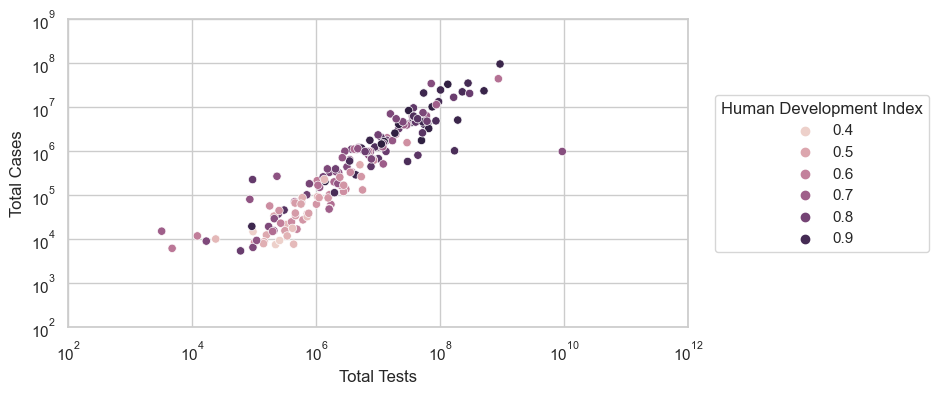

In [152]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=inter, x='total_tests', y='total_cases', hue="human_development_index")
plt.xlabel("Total Tests")
plt.ylabel("Total Cases")
plt.yscale("log")
plt.ylim(1e2,1e9)
plt.xscale("log")
plt.xlim(1e2,1e12)
plt.legend(title="Human Development Index", bbox_to_anchor = (1.4, 0.5), loc='center right')

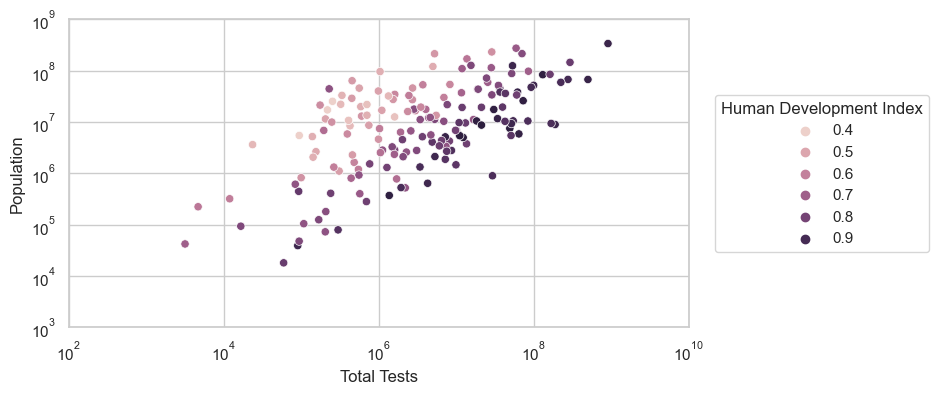

In [175]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=inter, x='total_tests', y='population', hue="human_development_index")
plt.xlabel("Total Tests")
plt.ylabel("Population")
plt.yscale("log")
plt.ylim(1e3,1e9)
plt.xscale("log")
plt.xlim(1e2,1e10)
plt.legend(title="Human Development Index", bbox_to_anchor = (1.4, 0.5), loc='center right')

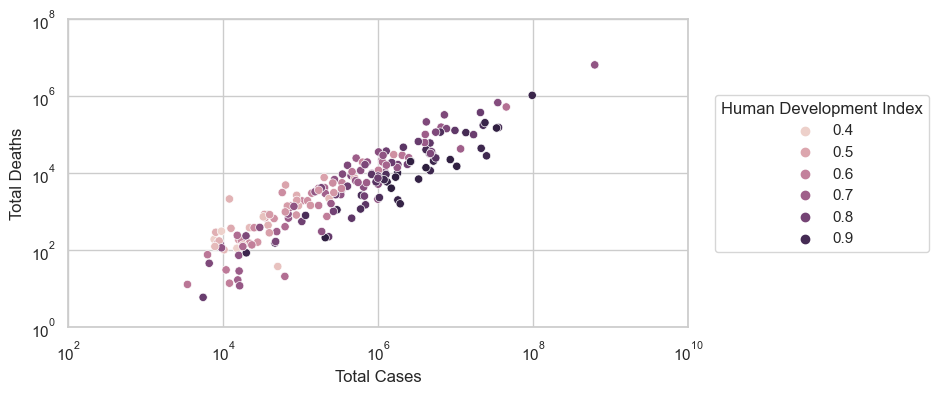

In [173]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=inter, x='total_cases', y='total_deaths', hue="human_development_index")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.yscale("log")
plt.ylim(1e0,1e8)
plt.xscale("log")
plt.xlim(1e2,1e10)
plt.legend(title="Human Development Index", bbox_to_anchor = (1.4, 0.5), loc='center right')

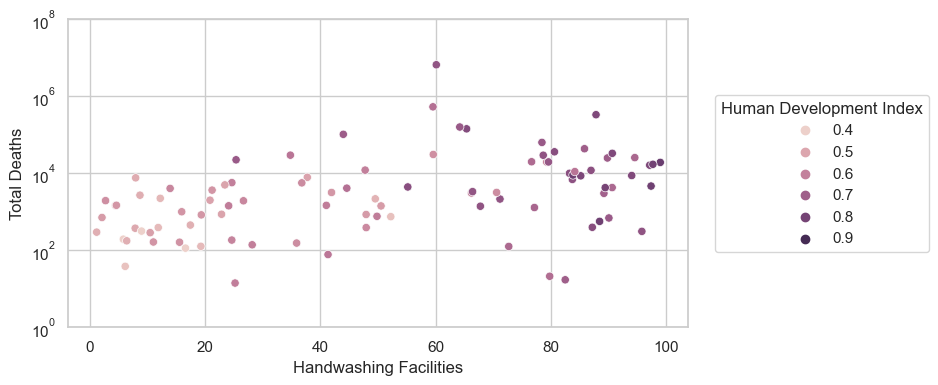

In [170]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=inter, x='handwashing_facilities', y='total_deaths', hue="human_development_index")
plt.xlabel("Handwashing Facilities")
plt.ylabel("Total Deaths")
plt.yscale("log")
plt.ylim(1e0,1e8)
#plt.xscale("log")
#plt.xlim(1e2,1e6)
plt.legend(title="Human Development Index", bbox_to_anchor = (1.4, 0.5), loc='center right')

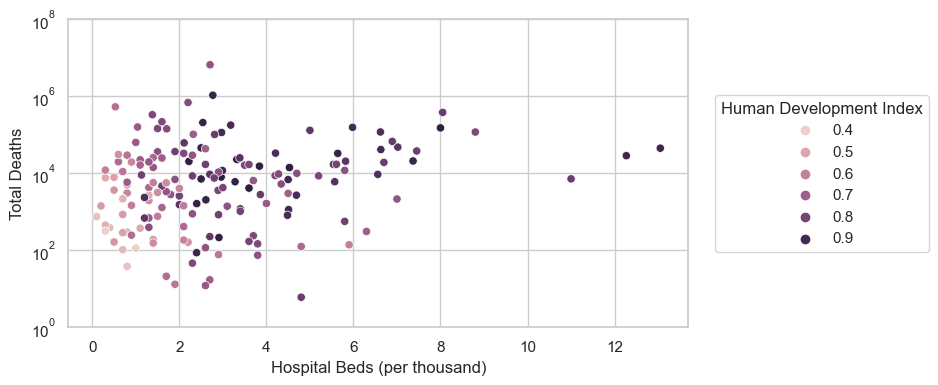

In [168]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=inter, x='hospital_beds_per_thousand', y='total_deaths', hue="human_development_index")
plt.xlabel("Hospital Beds (per thousand)")
plt.ylabel("Total Deaths")
plt.yscale("log")
plt.ylim(1e0,1e8)
#plt.xscale("log")
#plt.xlim(1e2,1e6)
plt.legend(title="Human Development Index", bbox_to_anchor = (1.4, 0.5), loc='center right')

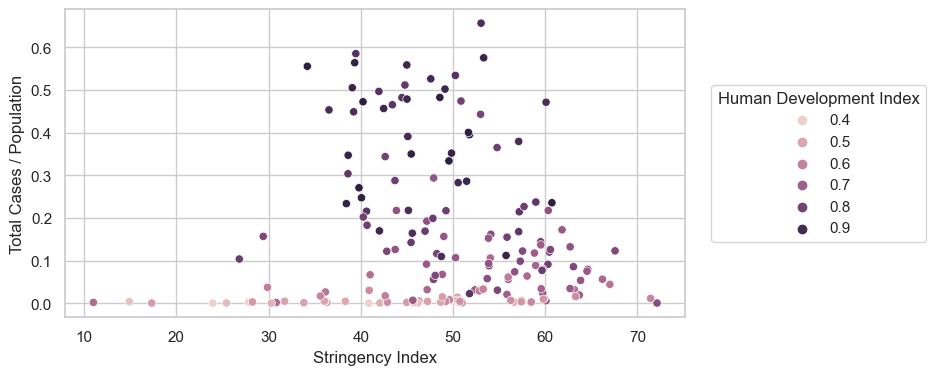

In [176]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=inter, x='stringency_index', y='cases_pop', hue="human_development_index")
plt.xlabel("Stringency Index")
#plt.xlim(0,0.2)
plt.ylabel("Total Cases / Population")
plt.legend(title="Human Development Index", bbox_to_anchor = (1.4, 0.5), loc='center right')

(0.1, 10000000.0)

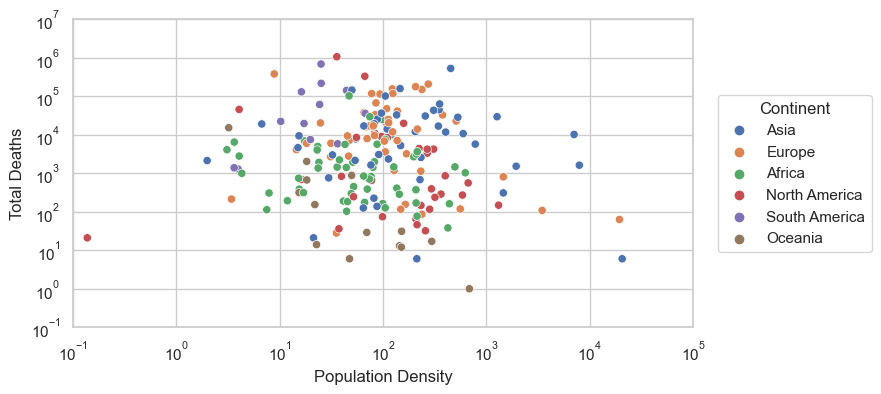

In [160]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=inter, x='population_density', y='total_deaths', hue="continent")
plt.xlabel("Population Density")
#plt.xlim(0,0.2)
plt.ylabel("Total Deaths")
plt.legend(title="Continent", bbox_to_anchor = (1.3, 0.5), loc='center right')
plt.xscale("log")
plt.xlim(1e-1,1e5)
plt.yscale("log")
plt.ylim(1e-1,1e7)

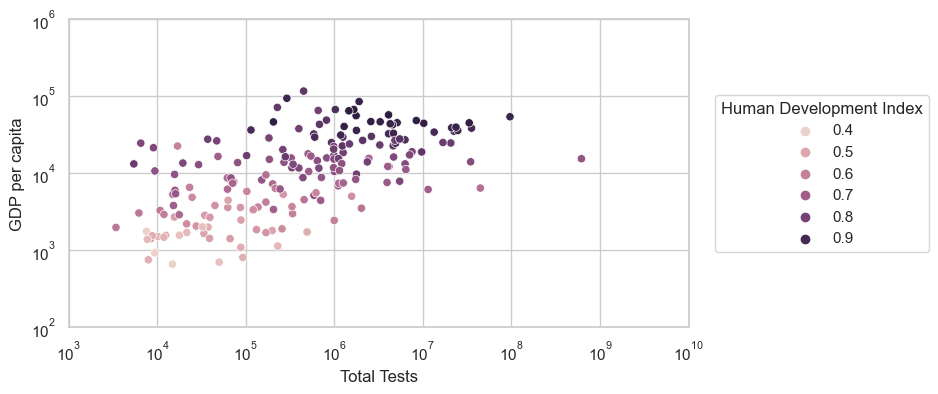

In [181]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=inter, x='total_cases', y='gdp_per_capita', hue="human_development_index")
plt.xlabel("Total Tests")
plt.ylabel("GDP per capita")
plt.yscale("log")
plt.ylim(1e2,1e6)
plt.xscale("log")
plt.xlim(1e3,1e10)
plt.legend(title="Human Development Index", bbox_to_anchor = (1.4, 0.5), loc='center right')